# Machine Learning Project Template
* This notebook provides a structured template for building an end-to-end machine learning project.
* Re-use this notebook througout your learning and in capstone project

## <b> <font color=green> STEP (1) Problem Definition, Scoping & Framing </font> </b>

### 1.1) Load Libraries
Import all necessary libraries for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### 1.2) Load The Dataset
Load the dataset and display the first few rows.

In [2]:
movie_df = pd.read_csv ('rotten_tomatoes_movies.csv')

In [3]:
movie_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
movie_df.shape

(17712, 22)

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

## <b> <font color=green> STEP (2) Data Exploration & Understanding </font> </b>

### 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [6]:
print("Numrical Feature Summary:")
movie_df.describe()

Numrical Feature Summary:


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [7]:
print("\nMissing Values:")
missing_data = movie_df.isnull().sum()
missing_precent = (missing_data / len(movie_df)) * 100
M_df = pd.DataFrame({
    'Missing Count' : missing_data,
    'Missing Precentage' : missing_precent
}).sort_values('Missing Precentage', ascending = False)
print(M_df[M_df['Missing Count'] > 0])



Missing Values:
                        Missing Count  Missing Precentage
critics_consensus                8578           48.430443
authors                          1542            8.705962
original_release_date            1166            6.583107
production_company                499            2.817299
audience_status                   448            2.529359
streaming_release_date            384            2.168022
actors                            352            1.987353
movie_info                        321            1.812331
runtime                           314            1.772809
audience_count                    297            1.676829
audience_rating                   296            1.671183
directors                         194            1.095303
tomatometer_status                 44            0.248419
tomatometer_rating                 44            0.248419
tomatometer_count                  44            0.248419
genres                             19            0.1072

In [8]:
num_cols = movie_df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nNumerical Features:{list(num_cols)}")

for col in num_cols[:5]:
    print(f"\n {col} - Unique Values:{movie_df[col].nunique()}")
    print(movie_df[col].value_counts().head())


Numerical Features:['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']

 runtime - Unique Values:190
runtime
90.0     834
95.0     603
100.0    540
93.0     539
96.0     511
Name: count, dtype: int64

 tomatometer_rating - Unique Values:101
tomatometer_rating
100.0    964
50.0     438
88.0     408
67.0     396
83.0     396
Name: count, dtype: int64

 tomatometer_count - Unique Values:407
tomatometer_count
5.0    793
6.0    728
7.0    666
8.0    595
9.0    532
Name: count, dtype: int64

 audience_rating - Unique Values:98
audience_rating
71.0    323
72.0    321
75.0    319
79.0    313
78.0    304
Name: count, dtype: int64

 audience_count - Unique Values:11069
audience_count
5.0     24
11.0    22
6.0     20
71.0    19
7.0     18
Name: count, dtype: int64


In [9]:
cat_cols = movie_df.select_dtypes(include=['object']).columns
print(f"\nCategorical Features:{list(cat_cols)}")

for col in cat_cols[:5]:
    print(f"\n {col} - Unique Values:{movie_df[col].nunique()}")
    print(movie_df[col].value_counts().head())


Categorical Features:['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company', 'tomatometer_status', 'audience_status']

 rotten_tomatoes_link - Unique Values:17712
rotten_tomatoes_link
m/0814255                    1
m/phoenix_1998               1
m/phyllis_and_harold_2008    1
m/photographing_fairies      1
m/phone_booth                1
Name: count, dtype: int64

 movie_title - Unique Values:17106
movie_title
Hamlet          6
Home            5
Gloria          4
Little Women    4
The Mummy       4
Name: count, dtype: int64

 movie_info - Unique Values:17389
movie_info
Wisecracking mercenary Deadpool meets Russell, an angry teenage mutant who lives at an orphanage. When Russell becomes the target of Cable -- a genetically enhanced soldier from the future -- Deadpool realizes that he'll need some help saving the boy from such a superio

### 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

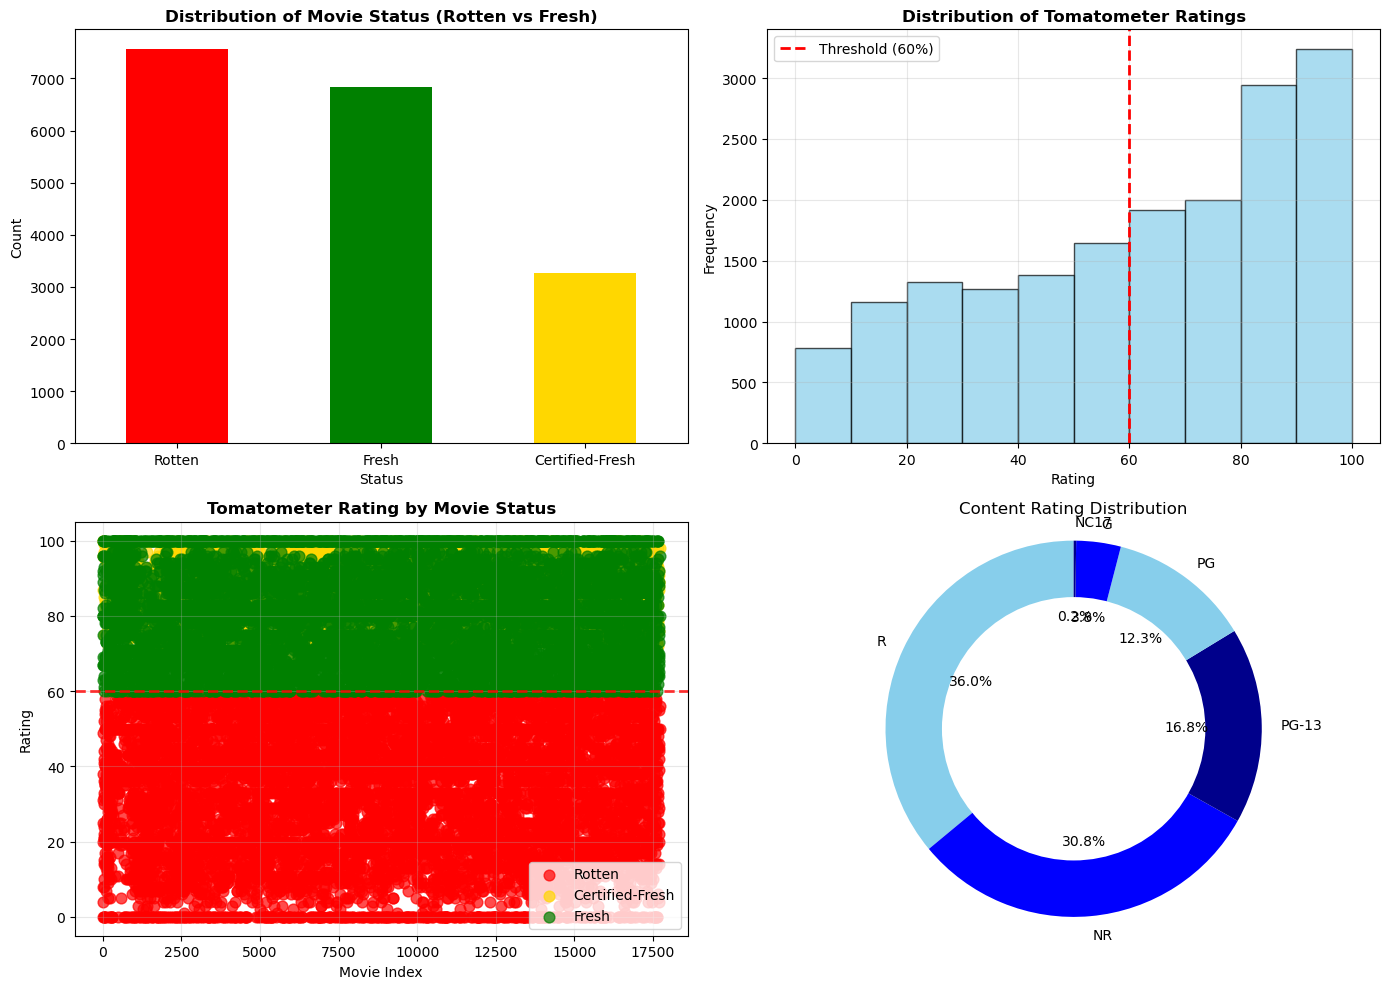

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
def create_visualizations(movie_df):
    # Drop missing values for the required columns
    movie_df = movie_df.copy()
    movie_df = movie_df.dropna(subset=['tomatometer_status', 'tomatometer_rating'])
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    # Bar plot: Distribution of Movie Status
    status_counts = movie_df['tomatometer_status'].value_counts()
    status_colors = ['red', 'green', 'gold']
    status_counts.plot(kind='bar', ax=axes[0, 0], color=status_colors[:len(status_counts)])
    axes[0, 0].set_title('Distribution of Movie Status (Rotten vs Fresh)', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Status')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].tick_params(axis='x', rotation=0)
    # Histogram: Tomatometer Ratings
    movie_df['tomatometer_rating'].hist(bins=10, ax=axes[0, 1], alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].axvline(x=60, color='red', linestyle='--', linewidth=2, label='Threshold (60%)')
    axes[0, 1].set_title('Distribution of Tomatometer Ratings', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Rating')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    # Scatter Plot: Rating by Status
    colors_map = {
        'Fresh': 'green',
        'Rotten': 'red',
        'Certified-Fresh': 'gold'
    }
    for status in movie_df['tomatometer_status'].unique():
        subset = movie_df[movie_df['tomatometer_status'] == status]
        axes[1, 0].scatter(subset.index, subset['tomatometer_rating'],
                           c=colors_map.get(status, 'gray'), label=status, s=60, alpha=0.7)
    axes[1, 0].axhline(y=60, color='red', linestyle='--', linewidth=2, alpha=0.8)
    axes[1, 0].set_title('Tomatometer Rating by Movie Status', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Movie Index')
    axes[1, 0].set_ylabel('Rating')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    # Optional: Pie chart for content_rating (if exists)
    if 'content_rating' in movie_df.columns:
        content_counts = movie_df['content_rating'].value_counts()
        blue_shades = ['skyblue', 'blue', 'darkblue']
        colors = (blue_shades * ((len(content_counts) // len(blue_shades)) + 1))[:len(content_counts)]
        axes[1, 1].pie(content_counts, labels=content_counts.index, autopct='%1.1f%%',
                      startangle=90, colors=colors)
        axes[1, 1].set_title('Content Rating Distribution')
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        axes[1, 1].add_artist(centre_circle)
        axes[1, 1].axis('equal')
    else:
        axes[1, 1].axis('off')  # Hide if not used
    plt.tight_layout()
    plt.show()
create_visualizations(movie_df)

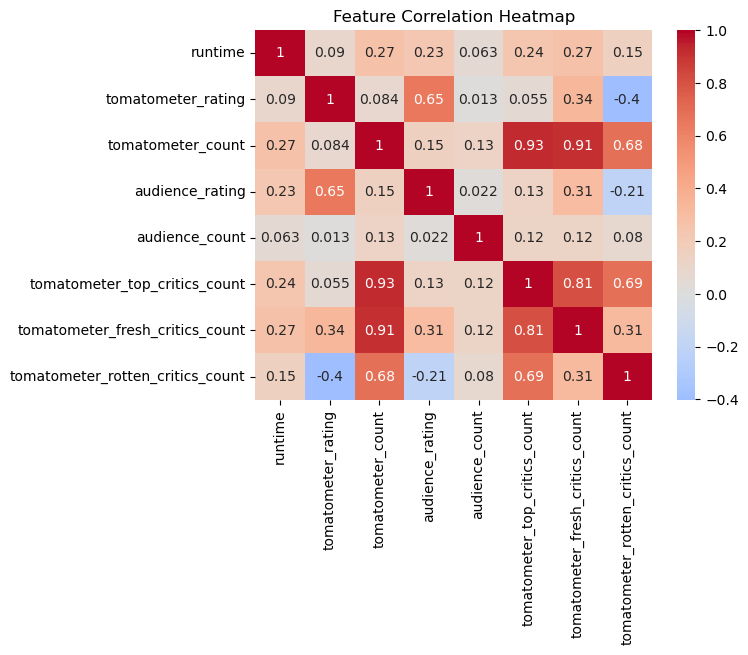

In [11]:
if len(num_cols) > 1:
    corr_matrix = movie_df[num_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.show()

In [12]:
movie_df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

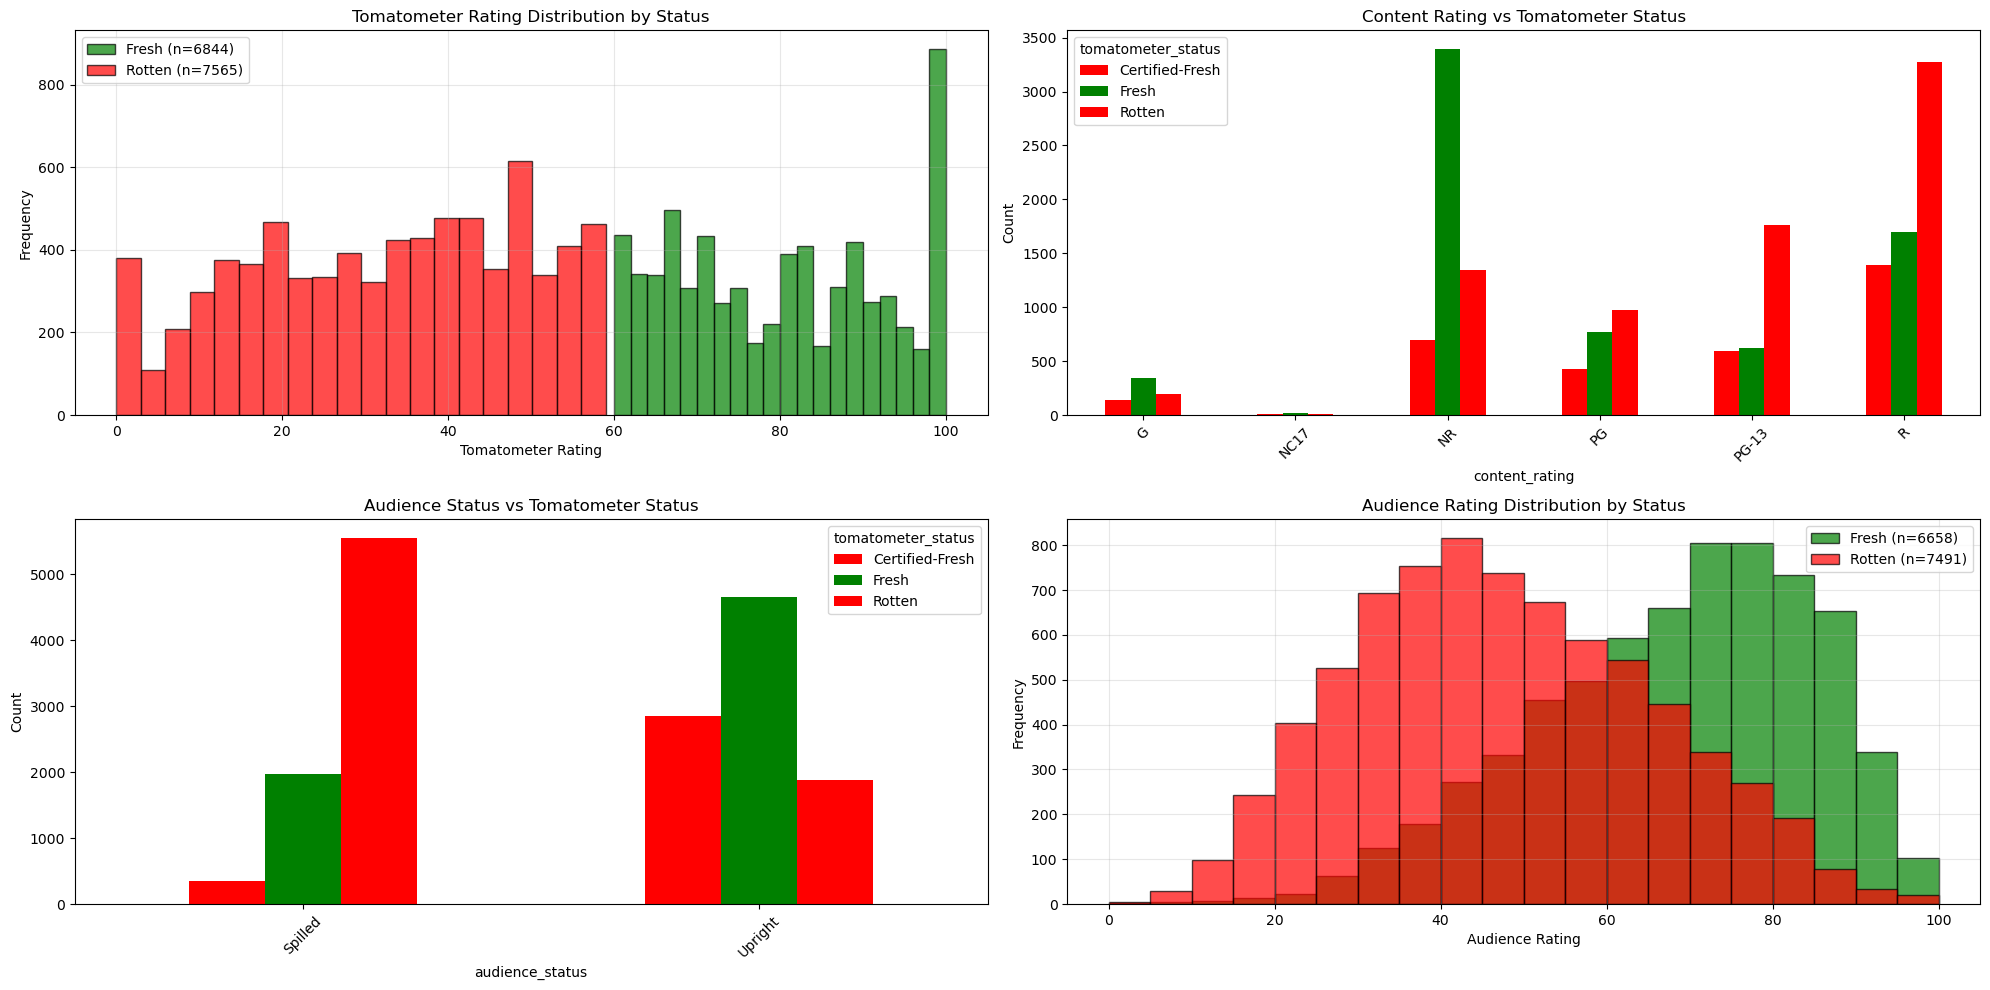

In [13]:
def analyze_key_features(movie_df):
    
    key_features = ['tomatometer_rating', 'content_rating', 'audience_status', 'audience_rating']
    
    if 'tomatometer_status' in movie_df.columns:
        df_fixed = movie_df.copy()
        
        if 'tomatometer_rating' in df_fixed.columns:
            if df_fixed['tomatometer_rating'].max() <= 1.0:
                df_fixed['tomatometer_rating'] = df_fixed['tomatometer_rating'] * 100
    
        if 'audience_rating' in df_fixed.columns:
            max_audience = df_fixed['audience_rating'].max()
            if max_audience <= 5.0:
                df_fixed['audience_rating'] = (df_fixed['audience_rating'] / max_audience) * 100
            elif max_audience <= 10.0:
                df_fixed['audience_rating'] = (df_fixed['audience_rating'] / 10) * 100
        
        plt.figure(figsize=(20, 10))
        
        for i, feature in enumerate(key_features, 1):
            if feature in df_fixed.columns:
                plt.subplot(2, 2, i)
                
                if feature in ['tomatometer_rating', 'audience_rating']:
                    fresh_mask = df_fixed['tomatometer_status'] == 'Fresh'
                    rotten_mask = df_fixed['tomatometer_status'] == 'Rotten'
                    
                    fresh_data = df_fixed[fresh_mask][feature].dropna()
                    rotten_data = df_fixed[rotten_mask][feature].dropna()
                    
                    if len(fresh_data) > 0:
                        plt.hist(fresh_data, alpha=0.7, label=f'Fresh (n={len(fresh_data)})', 
                                bins=20, color='green', edgecolor='black')
                    
                    if len(rotten_data) > 0:
                        plt.hist(rotten_data, alpha=0.7, label=f'Rotten (n={len(rotten_data)})', 
                                bins=20, color='red', edgecolor='black')
                    
                    plt.xlabel(feature.replace('_', ' ').title())
                    plt.ylabel('Frequency')
                    plt.title(f'{feature.replace("_", " ").title()} Distribution by Status')
                    plt.legend()
                    plt.grid(True, alpha=0.3)
                    
                else:
                    cross_tab = pd.crosstab(df_fixed[feature], df_fixed['tomatometer_status'])
                    cross_tab.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
                    plt.title(f'{feature.replace("_", " ").title()} vs Tomatometer Status')
                    plt.xticks(rotation=45)  # Fixed the syntax error
                    plt.ylabel('Count')
                    
        plt.tight_layout()
        plt.show()
    
    else:
        print("ERROR: 'tomatometer_status' column not found in dataframe")
        print("Available columns:", df.columns.tolist())
analyze_key_features(movie_df)

## <b> <font color=green> STEP (3) Data Preparation & Feature Engineering </font> </b>

### 3.1) Data Cleaning
Handle missing values and outliers.

In [14]:
numerical_cols = ['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
print(movie_df[numerical_cols].isnull().sum())

runtime                             314
tomatometer_rating                   44
tomatometer_count                    44
audience_rating                     296
audience_count                      297
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
dtype: int64


In [15]:
numerical_cols = movie_df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    if movie_df[col].isnull().sum() > 0:
        movie_df[col] = movie_df[col].fillna(0)
        print(f"Filled {col} missing values with 0")

Filled runtime missing values with 0
Filled tomatometer_rating missing values with 0
Filled tomatometer_count missing values with 0
Filled audience_rating missing values with 0
Filled audience_count missing values with 0


In [16]:
print(movie_df[numerical_cols].isnull().sum())

runtime                             0
tomatometer_rating                  0
tomatometer_count                   0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64


- Numerical Features:['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


- Categorical Features:['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company', 'tomatometer_status', 'audience_status']


In [17]:
def feature_eng ( movie_df):
    if 'tomatometer_status' in movie_df.columns:
        movie_df['target'] = (movie_df['tomatometer_status'] == 'Fresh').astype(int)
        movie_df['tomatometer_status'] = movie_df['tomatometer_status'].replace('Certified-Fresh', 'Fresh')
        print("Created binary target variable")

    if 'runtime' in movie_df.columns:
        movie_df['runtime_cat'] = pd.cut(movie_df['runtime'],
                                         bins=[0, 90, 120, 180, 300],
                                         labels=['Short', 'Mediam', 'Long', 'Vary_long'])
        print("Created runtime categories")

    if 'genres' in movie_df.columns:
        genre_clean = movie_df['genres'].str.get_dummies(sep=',')
        movie_df = pd.concat([movie_df, genre_clean.add_prefix('genre_')], axis=1)
        print(f"Created {len(genre_clean.columns)} genre features")

    if 'content_rating' in movie_df.columns:
        C_rating = { 'G':1, 'PG':2, 'PG-13':3, 'R':4, 'NC-17':5}
        movie_df['content_rating_encoded'] = movie_df['content_rating'].map(C_rating).fillna(0)
        print("Encoded content rating")

    if 'audience_status' in movie_df.columns:
        movie_df['audience_status_encoded'] = (movie_df['audience_status'] == 'Upright').astype(int)
        print("Encoded audiance status")
    

    if 'original_release_date' in movie_df.columns:
        movie_df['original_release_date'] = pd.to_datetime(movie_df['original_release_date'])
        movie_df['release_year'] = movie_df['original_release_date'].dt.year
        movie_df['release_month'] = movie_df['original_release_date'].dt.month
        movie_df['release_day_of_week'] = movie_df['original_release_date'].dt.dayofweek
        print("Extracted date features")

        return movie_df 


movie_df = feature_eng(movie_df)

Created binary target variable
Created runtime categories
Created 37 genre features
Encoded content rating
Encoded audiance status
Extracted date features


### 3.1) Feature Selection
Select the most relevant features for the model.

In [18]:
feature_columns = [
        'tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count',
        'audience_count', 'release_year', 'release_month', 'content_rating_encoded',
        'audience_status_encoded', 'tomatometer_top_critics_count',
        'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


X = movie_df[feature_columns]
y = movie_df['target']

print("Initial feature count:", len(feature_columns))
print("Selected features:", feature_columns)




Initial feature count: 12
Selected features: ['tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count', 'audience_count', 'release_year', 'release_month', 'content_rating_encoded', 'audience_status_encoded', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


In [19]:
print(y.value_counts(normalize=True))


target
0    0.613595
1    0.386405
Name: proportion, dtype: float64


In [20]:
print(movie_df[['tomatometer_status', 'target']].head(8))

  tomatometer_status  target
0             Rotten       0
1              Fresh       0
2              Fresh       1
3              Fresh       0
4              Fresh       1
5             Rotten       0
6              Fresh       0
7              Fresh       1


In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


C:\Users\jinan\AppData\Local\Temp\ipykernel_33592\203638081.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = movie_df.groupby('target', group_keys=False).apply(


Train size: 5313, Validation size: 1771, Test size: 1772

Model: Logistic Regression
Validation Accuracy: 0.8379
Validation F1 Score: 0.7853
Validation ROC AUC: 0.9083

Model: Random Forest
Validation Accuracy: 0.9887
Validation F1 Score: 0.9854
Validation ROC AUC: 0.9962


C:\Users\jinan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:13:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
Validation Accuracy: 0.9898
Validation F1 Score: 0.9868
Validation ROC AUC: 0.9978

Model: SGD Classifier
Validation Accuracy: 0.8634
Validation F1 Score: 0.7935
Validation ROC AUC: 0.9113


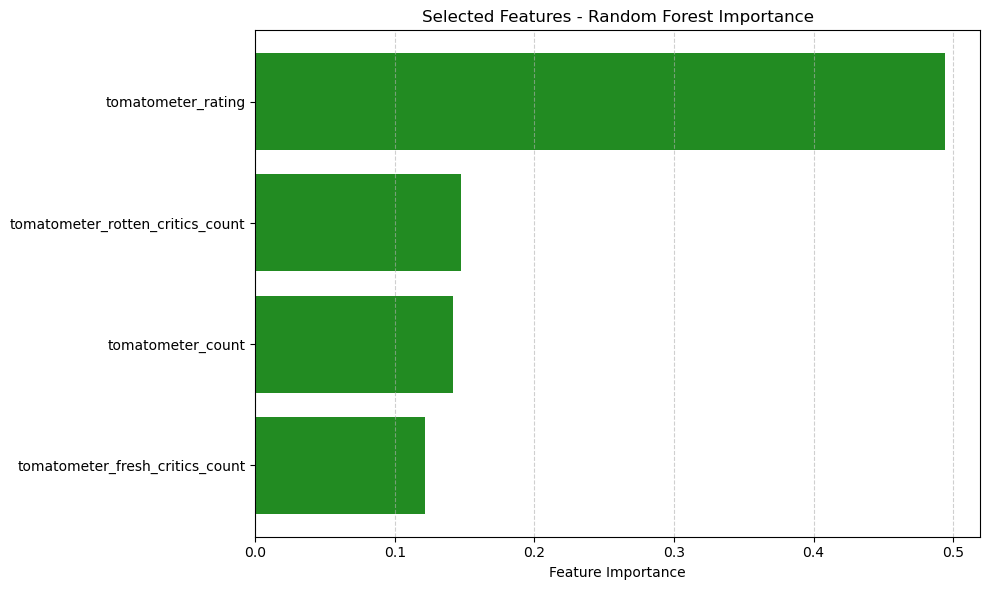

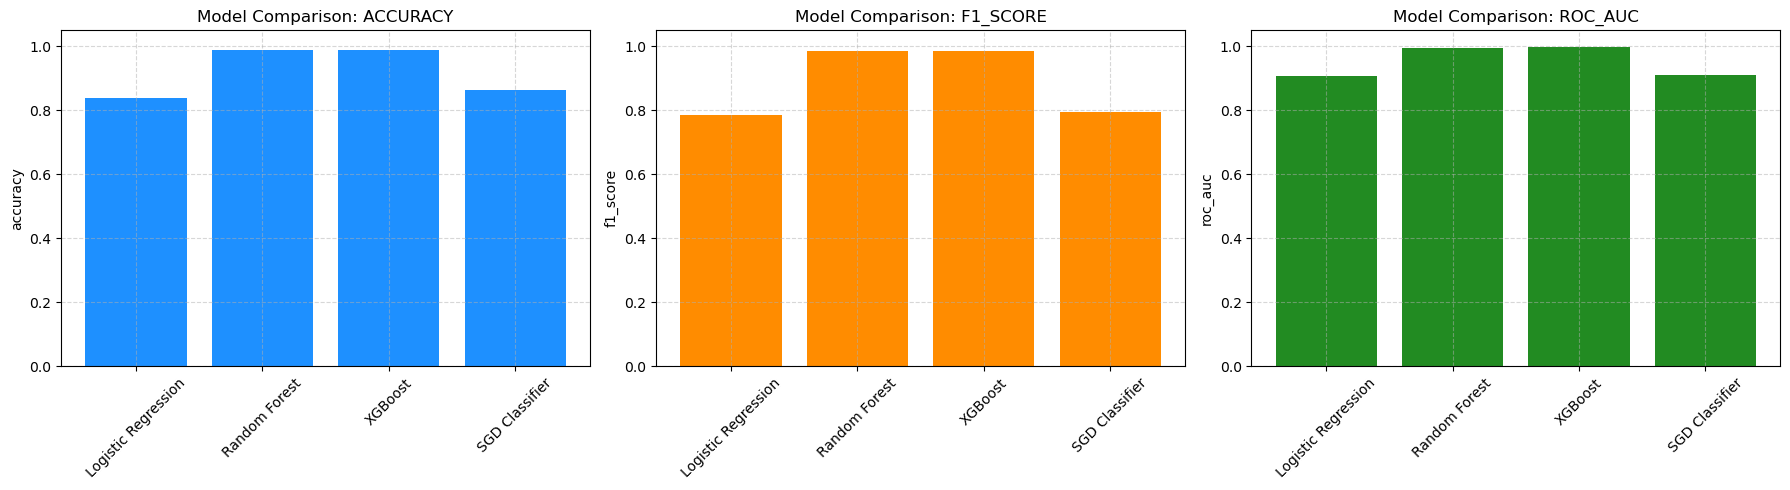

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Step 1: Sample the data
sample_fraction = 0.50
sampled_df = movie_df.groupby('target', group_keys=False).apply(
    lambda x: x.sample(frac=sample_fraction, random_state=42)
)


num_cols = [
    'runtime', 'tomatometer_rating', 'tomatometer_count',
    'audience_rating', 'audience_count',
    'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
    'tomatometer_rotten_critics_count'
]
cat_cols = ['content_rating', 'audience_status']
selected_features = num_cols + cat_cols

X = sampled_df[selected_features]
y = sampled_df['target']

#Step 2: Split into train, validation, test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train size: {X_train.shape[0]}, Validation size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")

#Step 3: Preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

X_train_pre = preprocessor.fit_transform(X_train)
X_val_pre = preprocessor.transform(X_val)
X_test_pre = preprocessor.transform(X_test)

# Step 4: Feature Selection BEFORE model training 
feature_selector_model = RandomForestClassifier(random_state=42)
feature_selector_model.fit(X_train_pre, y_train)

selector = SelectFromModel(feature_selector_model, prefit=True)
X_train_sel = selector.transform(X_train_pre)
X_val_sel = selector.transform(X_val_pre)
X_test_sel = selector.transform(X_test_pre)

# For plotting importance
importances = feature_selector_model.feature_importances_
support_mask = selector.get_support()
selected_feature_names = np.array(selected_features)[support_mask]
sorted_idx = np.argsort(importances[support_mask])[::-1]
sorted_features = selected_feature_names[sorted_idx]
sorted_importances = importances[support_mask][sorted_idx]

#Step 5: Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SGD Classifier": SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
}

# Step 6: Evaluate Models 
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    try:
        y_prob = model.predict_proba(X)[:, 1]
        roc_auc = roc_auc_score(y_true, y_prob)
    except:
        roc_auc = None
    return accuracy_score(y_true, y_pred), f1_score(y_true, y_pred), roc_auc

results = {}

for name, model in models.items():
    model.fit(X_train_sel, y_train)
    acc, f1, auc = evaluate_model(model, X_val_sel, y_val)
    results[name] = {'accuracy': acc, 'f1_score': f1, 'roc_auc': auc}
    print(f"\nModel: {name}")
    print(f"Validation Accuracy: {acc:.4f}")
    print(f"Validation F1 Score: {f1:.4f}")
    if auc is not None:
        print(f"Validation ROC AUC: {auc:.4f}")

#  Plot Selected Feature Importance 
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], sorted_importances[::-1], color='forestgreen')
plt.xlabel("Feature Importance")
plt.title("Selected Features - Random Forest Importance")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 8: Visualize Model Comparison 
results_df = pd.DataFrame(results).T

plt.style.use('seaborn-v0_8-muted')
metrics = ['accuracy', 'f1_score', 'roc_auc']
colors = ['dodgerblue', 'darkorange', 'forestgreen']

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axs[i].bar(results_df.index, results_df[metric], color=colors[i])
    axs[i].set_title(f'Model Comparison: {metric.upper()}')
    axs[i].set_ylabel(metric)
    axs[i].set_ylim(0, 1.05)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### 3.2) Data Transforms
Apply transformations to prepare the data for modeling.

## <b> <font color=green> STEP (4)  ML Model Selection & Evaluation </font> </b>

### 4.1) Split-out Validation Dataset
Split the dataset into training and validation sets.

### 4.2) Test Options and Evaluation Metric
Define the evaluation metric for the model.

### 4.3) Spot Check Algorithms
Test multiple algorithms to identify the best-performing one.

## <b> <font color=green> STEP (5)  Performance Tuning & Optimization </font> </b>

### 5.1) Algorithm Tuning
Optimize hyperparameters for better performance.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': None}
Random Forest Validation Accuracy: 0.9898


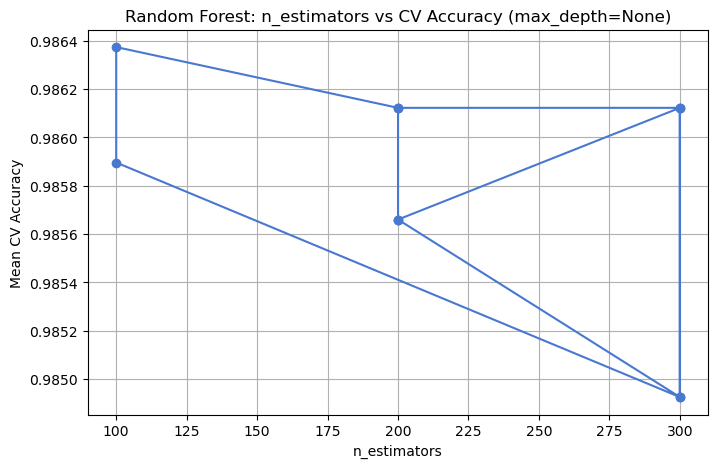

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def tune_random_forest_improved(X_train_sel, y_train, X_val_sel, y_val, plot_max_depth=None): 
    param_grid = {
        'n_estimators': [100, 200, 300],           
        'max_depth': [None],                 
        'min_samples_split': [2, 5],               
        'max_features': ['sqrt', 'log2']           
    }
    rf = RandomForestClassifier(random_state=42)
    # RandomizedSearchCV - tries only 12 combinations
    random_search = RandomizedSearchCV(
        rf, param_grid,
        n_iter=10,          # Only try 12 random combination               # 3-fold CV (to make it faster 5-fold)
        scoring='f1',
        n_jobs=-1,          # Use all CPU cores
        verbose=1,
        random_state=42
    )
    random_search.fit(X_train_sel, y_train)
    print("Random Forest Best Params:", random_search.best_params_)
    val_acc = random_search.best_estimator_.score(X_val_sel, y_val)
    print(f"Random Forest Validation Accuracy: {val_acc:.4f}")
    
    # Plot n_estimators vs mean test score filtered by plot_max_depth
    results = random_search.cv_results_
    mean_test_scores = results['mean_test_score']
    params = results['params']
    n_estimators_vals = []
    scores = []
    for i, param in enumerate(params):
        if param['max_depth'] == plot_max_depth:
            n_estimators_vals.append(param['n_estimators'])
            scores.append(mean_test_scores[i])
    if len(n_estimators_vals) == 0:
        print(f"No results found for max_depth={plot_max_depth}")
        return random_search
    plt.figure(figsize=(8,5))
    plt.plot(n_estimators_vals, scores, marker='o')
    plt.xlabel('n_estimators')
    plt.ylabel('Mean CV Accuracy')
    plt.title(f'Random Forest: n_estimators vs CV Accuracy (max_depth={plot_max_depth})')
    plt.grid(True)
    plt.show()
    return random_search

# ✅ Call using feature-selected data
random_search_advanced = tune_random_forest_improved(
    X_train_sel, y_train, X_val_sel, y_val,
    plot_max_depth=None
)

here the accuracy increace by points only

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Logistic Regression Best Params: {'C': 0.1, 'max_iter': 300, 'solver': 'liblinear'}
Logistic Regression Validation Accuracy: 0.8622247317899492


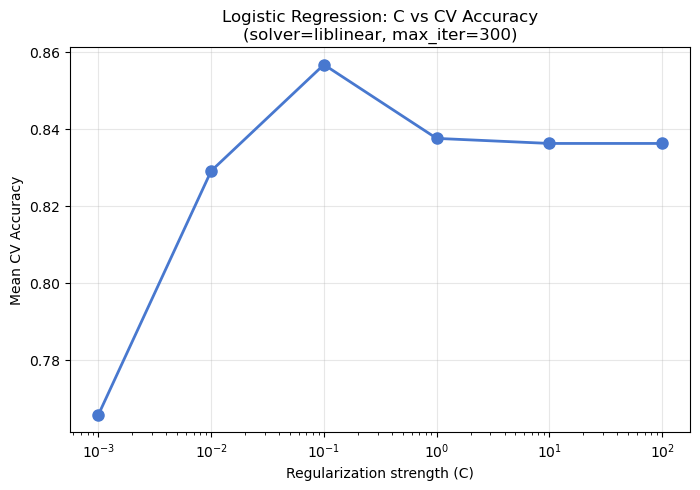

In [24]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Improved parameter grid - removed duplicate 0.01 and expanded search
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['lbfgs', 'liblinear'],      
    'max_iter': [300, 500]                 
}
lr = LogisticRegression(random_state=42)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr.fit(X_train_sel, y_train)

print("Logistic Regression Best Params:", grid_lr.best_params_)
print("Logistic Regression Validation Accuracy:", grid_lr.best_estimator_.score(X_val_sel, y_val))

# Plot results - filter by best solver for cleaner visualization
results = grid_lr.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

best_solver = grid_lr.best_params_['solver']
best_max_iter = grid_lr.best_params_['max_iter']

# Filter results for best solver and max_iter combination
C_vals = []
scores = []
for i, param in enumerate(params):
    if param['solver'] == best_solver and param['max_iter'] == best_max_iter:
        C_vals.append(param['C'])
        scores.append(mean_test_scores[i])

plt.figure(figsize=(8, 5))
plt.plot(C_vals, scores, marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Mean CV Accuracy')
plt.title(f'Logistic Regression: C vs CV Accuracy\n(solver={best_solver}, max_iter={best_max_iter})')
plt.grid(True, alpha=0.3)
plt.show()

Model: Logistic Regression
Validation Accuracy: 0.8264 here we notice point increase to the accuracy after hyperparameter tuning 0.8267466478475652 

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
SGD Classifier Best Params: {'alpha': 0.0001, 'eta0': 0.1, 'l1_ratio': 0.5, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'elasticnet'}
SGD Classifier Validation Accuracy: 0.8932806324110671


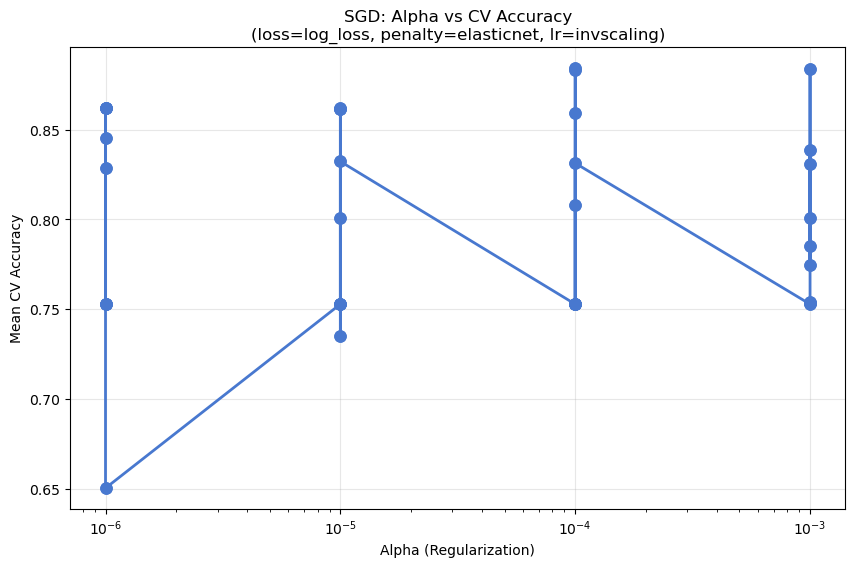

In [25]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

# Improved parameter grid - expand around best values
param_grid_sgd = {
    'loss': ['log_loss', 'hinge'],  
    'penalty': ['l1', 'l2', 'elasticnet'], 
    'alpha': [0.000001, 0.00001, 0.0001, 0.001],  
    'max_iter': [1000, 2000],  
    'learning_rate': ['invscaling', 'adaptive', 'constant'],  
    'eta0': [0.01, 0.1, 1.0],  
    'l1_ratio': [0.15, 0.5, 0.85]  
}

sgd = SGDClassifier(random_state=42)
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_sgd.fit(X_train_sel, y_train)

print("SGD Classifier Best Params:", grid_sgd.best_params_)
print("SGD Classifier Validation Accuracy:", grid_sgd.best_estimator_.score(X_val_sel, y_val))

results = grid_sgd.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

# Better visualization - filter by best parameters
best_loss = grid_sgd.best_params_['loss']
best_penalty = grid_sgd.best_params_['penalty']
best_lr = grid_sgd.best_params_['learning_rate']

# Filter results for best combination
alphas = []
scores = []
for i, param in enumerate(params):
    if (param['loss'] == best_loss and 
        param['penalty'] == best_penalty and 
        param['learning_rate'] == best_lr):
        alphas.append(param['alpha'])
        scores.append(mean_test_scores[i])

if len(alphas) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, scores, marker='o', linewidth=2, markersize=8)
    plt.xscale('log')
    plt.xlabel('Alpha (Regularization)')
    plt.ylabel('Mean CV Accuracy')
    plt.title(f'SGD: Alpha vs CV Accuracy\n(loss={best_loss}, penalty={best_penalty}, lr={best_lr})')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    # Fallback to scatter plot if filtering doesn't work
    alphas = [p['alpha'] for p in params]
    plt.figure(figsize=(10, 6))
    plt.scatter(alphas, mean_test_scores, alpha=0.6)
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Mean CV Accuracy')
    plt.title('SGD Classifier: Alpha vs CV Accuracy (All Combinations)')
    plt.grid(True, alpha=0.3)
    plt.show()

Peak at α=10⁻⁴ (0.0001): This confirms your original finding - this alpha value gives the best regularization balanc

Small alpha → Weak regularization → Model overfits to training data → Poor CV performance
Large alpha → Strong regularization → Model becomes too simple → Poor CV performance
Medium alpha → Balanced regularization → Best generalization → Peak CV performance

### 5.2) Ensembles
Combine multiple models to improve accuracy.

Soft Voting
Instead of just using the predicted class labels, soft voting uses the predicted probabilities for each class. It averages the probabilities for each class across all models and selects the class with the highest average probability.
Example:
If three models predict probabilities for Class A as [0.7, 0.6, 0.5] and for Class B as [0.3, 0.4, 0.5], soft voting will average the probabilities for each class (0.6 for A and 0.4 for B) and predict Class A.

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Create voting ensemble
ensemble = VotingClassifier(
    estimators=[
        ('lr', grid_lr),
        ('sgd', grid_sgd),
        ('rf', random_search_advanced)
    ],
    voting='soft'  # Use probability-based voting
)

# Train ensemble
ensemble.fit(X_train_sel, y_train)

# Evaluate ensemble
ensemble_val_acc = ensemble.score(X_val_sel, y_val)
print(f"Ensemble Validation Accuracy: {ensemble_val_acc:.4f}")




Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ensemble Validation Accuracy: 0.9492


## <b> <font color=green> STEP (6) Results Interpretation & Deployment </font> </b>

### 6.1) Predictions on Validation Dataset
Make predictions using the validation dataset.

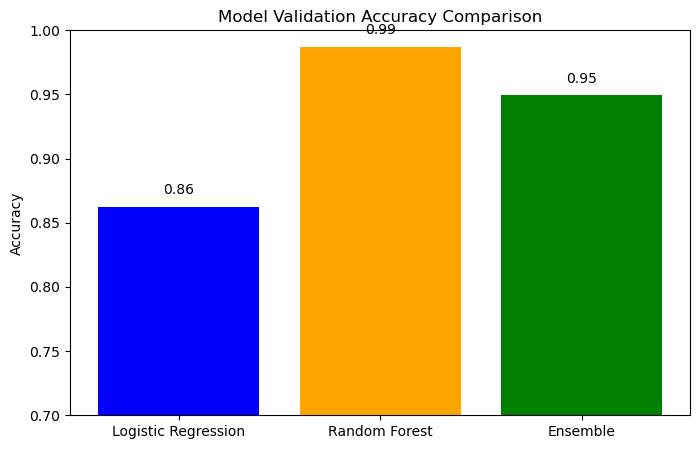

In [35]:
model_names = ['Logistic Regression', 'Random Forest', 'Ensemble']
val_scores = [
    grid_lr.score(X_val_sel, y_val),
    random_search_advanced .score(X_val_sel, y_val),
    ensemble.score(X_val_sel, y_val),
]

plt.figure(figsize=(8, 5))
plt.bar(model_names, val_scores, color=['blue', 'orange', 'green', 'purple'])
plt.ylim(0.7, 1.0)
plt.title("Model Validation Accuracy Comparison")
plt.ylabel("Accuracy")
for i, score in enumerate(val_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center')
plt.show()


### 6.2) Create Standalone Model on Entire Training Dataset
Train the final model on the entire dataset.

### 6.3) Save Model for Later Use
Save the trained model to a file.